In [32]:
# # V1 AL experiment
# tb_event_files = {
#     "past_state_False_visualFalse": "./models/tensorboard/Combo3_V1AL/components/pretrain/past_state_False_visualFalse_contrastive_Falsefreeze_False/randperm_False/Big_fixed_noself-att_2/sparse_f:None_id:None/w:0.05_wp:0.25/Cont:False_window:0.05_f_window:0.25_df:0.01_blocksize:55_conv_True_shuffle:True_batch:64_sparse_(None_None)_blocksz110_pos_emb:False_temp_emb:True_drop:0.1_dt:True_2.0_27_max0.01_(8, 8, 8)_8_256/events.out.tfevents.1682460480.ip-172-31-42-133.ec2.internal.122296.1",
#     # "past_state_False_visualFalse": "./models/tensorboard/Combo3_V1AL/components/pretrain/past_state_False_visualFalse_contrastive_Falsefreeze_False/randperm_False/Big_fixed_noself-att_2/sparse_f:None_id:None/w:0.05_wp:0.25/Cont:False_window:0.05_f_window:0.25_df:0.01_blocksize:55_conv_True_shuffle:True_batch:64_sparse_(None_None)_blocksz110_pos_emb:False_temp_emb:True_drop:0.1_dt:True_2.0_27_max0.01_(8, 8, 8)_8_256/events.out.tfevents.1682460480.ip-172-31-42-133.ec2.internal.122296.1"
#     "past_state_False_visualTrue": "./models/tensorboard/Combo3_V1AL/components/pretrain/past_state_False_visualTrue_contrastive_False_freeze_False/randperm_False/Big_fixed_noself-att_2/sparse_f:None_id:None/w:0.05_wp:0.25/Cont:False_window:0.05_f_window:0.25_df:0.01_blocksize:55_conv_True_shuffle:True_batch:64_sparse_(None_None)_blocksz110_pos_emb:False_temp_emb:True_drop:0.1_dt:True_2.0_27_max0.01_(8, 8, 8)_8_256/events.out.tfevents.1682464441.ip-172-31-42-133.ec2.internal.45089.0",
#     "past_state_False_visualTrue": "./models/tensorboard/Combo3_V1AL/components/pretrain/past_state_False_visualTrue_contrastive_False_freeze_False/randperm_False/Big_fixed_noself-att_2/sparse_f:None_id:None/w:0.05_wp:0.25/Cont:False_window:0.05_f_window:0.25_df:0.01_blocksize:55_conv_True_shuffle:True_batch:64_sparse_(None_None)_blocksz110_pos_emb:False_temp_emb:True_drop:0.1_dt:True_2.0_27_max0.01_(8, 8, 8)_8_256/events.out.tfevents.1682464441.ip-172-31-42-133.ec2.internal.45089.1"
# }

import glob
import os

event_file_dirs = "./models/tensorboard/Combo3_V1AL/components/pretrain"
event_file_paths = glob.glob(os.path.join(event_file_dirs, "**", "*.tfevents.*"), recursive=True)


# # dict from paths in event_file_paths.
tb_event_files = {}
for path in event_file_paths:
    key = path.split("/")[-7]
    value = path
    tb_event_files[key] = value

In [33]:
import matplotlib.pyplot as plt
from neuroformer.visualize import nature_style

/tmp/ipykernel_27614/2269188765.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrows, ncols, y_keys.index(y_key) + 1)


failed: ./models/tensorboard/Combo3_V1AL/components/pretrain/past_state_True_visualFalse_contrastive_False_freeze_False/randperm_False/Big_fixed_noself-att_2/sparse_f:None_id:None/w:0.05_wp:0.25/Cont:False_window:0.05_f_window:0.25_df:0.01_blocksize:55_conv_True_shuffle:True_batch:64_sparse_(None_None)_blocksz110_pos_emb:False_temp_emb:True_drop:0.1_dt:True_2.0_27_max0.01_(8, 8, 8)_8_256/events.out.tfevents.1682460765.ip-172-31-42-133.ec2.internal.127956.1
failed: ./models/tensorboard/Combo3_V1AL/components/pretrain/past_state_True_visualFalse_contrastive_False_freeze_False/randperm_False/Big_fixed_noself-att_2/sparse_f:None_id:None/w:0.05_wp:0.25/Cont:False_window:0.05_f_window:0.25_df:0.01_blocksize:55_conv_True_shuffle:True_batch:64_sparse_(None_None)_blocksz110_pos_emb:False_temp_emb:True_drop:0.1_dt:True_2.0_27_max0.01_(8, 8, 8)_8_256/events.out.tfevents.1682460765.ip-172-31-42-133.ec2.internal.127956.1
failed: ./models/tensorboard/Combo3_V1AL/components/pretrain/past_state_True_v

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


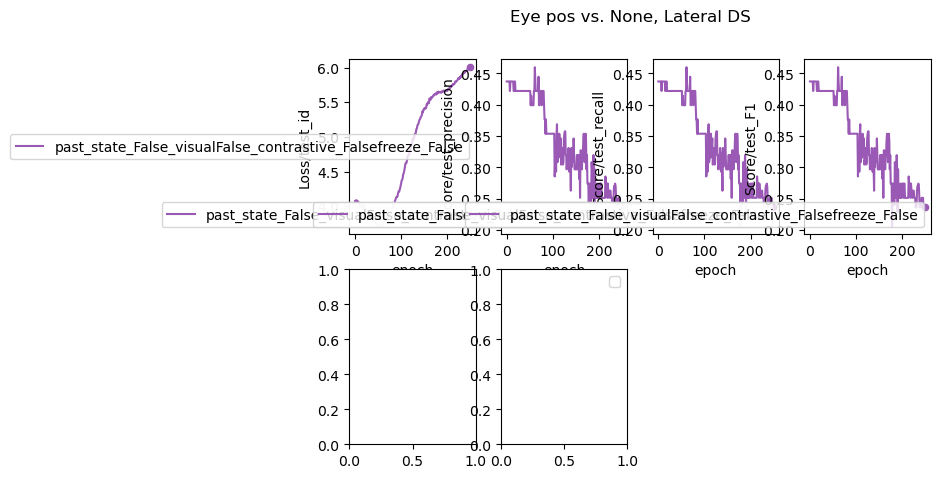

In [36]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import seaborn as sns

y_keys = ["Loss/test_id", "Score/test_precision", "Score/test_recall", "Score/test_F1", 
          "Score/train_cls", "Score/test_cls"]
fig = plt.figure(figsize=(7.5, 5))

plt.suptitle("Eye pos vs. None, Lateral DS")
colors = ["#9b59b6", "#2ecc71"]
plt.xlabel("Epoch")
plt.ylabel("Neural Decoding Loss")
n_subplots = len(y_keys)
nrows = 2
ncols = n_subplots // nrows + 1
dd_paths = []
for n_file, (key, log_file) in enumerate(tb_event_files.items()):
    for idx, y_key in enumerate(y_keys):
        plt.subplot(nrows, ncols, y_keys.index(y_key) + 1)
        event_accumulator = EventAccumulator(log_file)
        event_accumulator.Reload()
        tags = event_accumulator.Tags()['scalars']
        if y_key in tags:
            values = event_accumulator.Scalars(y_key)
            # plt.plot([x.step for x in values], [x.value for x in values], label=log_file)
            if len(values) < 100:
                continue
            else:
                try:
                    dd_paths.append(log_file)
                    df = pd.DataFrame({"epoch": [x.step for x in values], y_key: [x.value for x in values]})
                    sns.lineplot(data=df, x="epoch", y=y_key, label=key, color=colors[n_file])
                    plt.scatter(df["epoch"].iloc[-1], df[y_key].iloc[-1], color=colors[n_file], s=20)
                except:
                    print(f"failed: {log_file}")
                    continue

plt.legend()
# make background non-transparent
fig.patch.set_alpha(1)
save_path = "./models/tensorboard/visnav_lateral/plots"
# plt.savefig(os.path.join(save_path, "losses.png"), dpi=300)
# plt.savefig(os.path.join(save_path, "losses.svg"), dpi=300)